In [17]:
import polars as pl
import polars.selectors as cs

### Batting Data 

In [18]:
(batting :=
 pl.read_csv('./data/lahman_1871-2024_csv/Batting.csv')
     .filter((pl.col('yearID') >= 2013) & (pl.col('stint') == 1))
    .select(cs.by_name('playerID', 'yearID') | cs.integer())
)




playerID,yearID,stint,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2013,1,43,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2015,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null
"""abadfe01""",2013,1,39,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2014,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2015,1,62,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuninmi01""",2022,1,36,null,115,7,17,3,0,5,16,0,0,6,46,0,1,0,1,2,null
"""zuninmi01""",2023,1,42,42,124,11,22,7,0,3,11,0,0,15,61,0,1,0,0,3,null
"""zychto01""",2015,1,13,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null


### Fielding Stats 

In [19]:

fielding = (
    pl.read_csv('./data/lahman_1871-2024_csv/Fielding.csv')
     .filter((pl.col('yearID') >= 2013) & (pl.col('stint') == 1))
    .filter(pl.col('PO') == 0)
)

fielding


playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
str,i64,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""aardsda01""",2015,1,"""ATL""","""NL""","""P""",33,0,92,0,1,1,0,null,null,null,null,null
"""abadfe01""",2014,1,"""OAK""","""AL""","""P""",69,0,172,0,8,0,0,null,null,null,null,null
"""abadfe01""",2016,1,"""MIN""","""AL""","""P""",39,0,102,0,3,0,1,null,null,null,null,null
"""abadfe01""",2017,1,"""BOS""","""AL""","""P""",48,0,131,0,6,0,1,null,null,null,null,null
"""abadfe01""",2019,1,"""SFN""","""NL""","""P""",21,0,39,0,0,0,0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuberty01""",2024,1,"""TBA""","""AL""","""P""",2,0,10,0,0,0,0,null,null,null,null,null
"""zuniggu01""",2023,1,"""SLN""","""NL""","""P""",2,0,6,0,0,0,0,null,null,null,null,null
"""zuniggu01""",2024,1,"""LAA""","""AL""","""P""",15,0,53,0,1,0,0,null,null,null,null,null


### All-Star Data 

In [20]:
allstar_full = (
    pl.read_csv('./data/lahman_1871-2024_csv/AllstarFull.csv',
                columns=['playerID', 'yearID'])  
    .filter(pl.col('yearID') >= 2013)
    .unique()
    .with_columns(pl.lit('yes').alias('Allstar'))
)

allstar_full

playerID,yearID,Allstar
str,i64,str
"""grayso01""",2023,"""yes"""
"""beltbr01""",2016,"""yes"""
"""darviyu01""",2013,"""yes"""
"""gonzaad01""",2015,"""yes"""
"""ramosaj01""",2016,"""yes"""
…,…,…
"""cuddymi01""",2013,"""yes"""
"""perezma02""",2022,"""yes"""
"""carroco02""",2023,"""yes"""


### Combining Data - All-Star

In [21]:


(allstar_joined :=
 fielding
        .join(batting, on = ['playerID', 'yearID'], how='left', suffix = '_bat')
        .join(allstar_full, on=['playerID', 'yearID'], how='left', suffix='_allstar')
        .with_columns(pl.col("Allstar").fill_null('no'))
        .select(cs.by_name('Allstar') | cs.by_name('playerID', 'yearID') | cs.integer())
)



playerID,yearID,stint,G,GS,InnOuts,PO,A,E,DP,stint_bat,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB_bat,CS_bat,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""aardsda01""",2015,1,33,0,92,0,1,1,0,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no"""
"""abadfe01""",2014,1,69,0,172,0,8,0,0,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no"""
"""abadfe01""",2016,1,39,0,102,0,3,0,1,1,39,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no"""
"""abadfe01""",2017,1,48,0,131,0,6,0,1,1,48,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no"""
"""abadfe01""",2019,1,21,0,39,0,0,0,0,1,21,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuberty01""",2024,1,2,0,10,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no"""
"""zuniggu01""",2023,1,2,0,6,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no"""
"""zuniggu01""",2024,1,15,0,53,0,1,0,0,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no"""


In [22]:
training_allstar = allstar_joined.with_columns(TrainingValidation = pl.when(pl.col('yearID') < 2024).then(pl.lit('Training')).otherwise(pl.lit('Validation')))
training_allstar

playerID,yearID,stint,G,GS,InnOuts,PO,A,E,DP,stint_bat,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB_bat,CS_bat,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""aardsda01""",2015,1,33,0,92,0,1,1,0,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2014,1,69,0,172,0,8,0,0,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2016,1,39,0,102,0,3,0,1,1,39,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2017,1,48,0,131,0,6,0,1,1,48,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2019,1,21,0,39,0,0,0,0,1,21,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuberty01""",2024,1,2,0,10,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""
"""zuniggu01""",2023,1,2,0,6,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
"""zuniggu01""",2024,1,15,0,53,0,1,0,0,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""


In [23]:
training_allstar.filter((pl.col('yearID') == 2024))

playerID,yearID,stint,G,GS,InnOuts,PO,A,E,DP,stint_bat,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB_bat,CS_bat,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""acunalu01""",2024,1,1,0,18,0,2,0,0,1,14,14,39,6,12,2,1,3,6,0,1,1,6,0,0,0,0,1,0,"""no""","""Validation"""
"""adcocty01""",2024,1,3,0,13,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""
"""akinke01""",2024,1,66,0,236,0,7,0,0,1,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""
"""aldegsa01""",2024,1,3,3,39,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""
"""allenni02""",2024,1,2,0,6,0,2,0,1,1,41,41,97,6,17,4,0,1,4,0,0,5,20,0,0,3,0,0,0,"""no""","""Validation"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""yoshima02""",2024,1,1,0,3,0,0,0,0,1,108,108,378,45,106,21,0,10,56,2,0,27,52,0,14,0,2,6,0,"""no""","""Validation"""
"""youngal01""",2024,1,3,0,6,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""
"""zastrro01""",2024,1,9,3,23,0,1,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""no""","""Validation"""


In [24]:
training_allstar.head()

playerID,yearID,stint,G,GS,InnOuts,PO,A,E,DP,stint_bat,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB_bat,CS_bat,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""aardsda01""",2015,1,33,0,92,0,1,1,0,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2014,1,69,0,172,0,8,0,0,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2016,1,39,0,102,0,3,0,1,1,39,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2017,1,48,0,131,0,6,0,1,1,48,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""
"""abadfe01""",2019,1,21,0,39,0,0,0,0,1,21,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,"""no""","""Training"""


## Lab 5.2 ##

In [25]:
import polars as pl

df = training_allstar

df = df.with_columns(pl.col("Allstar").str.to_lowercase())

counts = (
    df.group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)

counts_2024 = (
    df.filter(pl.col("yearID") == 2024)
      .group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)


In [26]:
counts
counts_2024

Allstar,count,percent
str,u32,f64
"""no""",357,0.983471
"""yes""",6,0.016529


In [27]:
df = df.with_columns(pl.col("yearID").cast(pl.Int64))

VAL_YEAR = 2024

training_df = df.filter(pl.col("yearID") < VAL_YEAR)

validation_df = df.filter(pl.col("yearID") == VAL_YEAR)


In [28]:
pl.DataFrame({
    "Dataset": ["Training", "Validation"],
    "Years": [
        training_df.select(pl.col("yearID").unique()).to_series().to_list(),
        validation_df.select(pl.col("yearID").unique()).to_series().to_list()
    ],
    "Shape": [
        training_df.shape,
        validation_df.shape
    ]
})

Dataset,Years,Shape
str,list[i64],list[i64]
"""Training""","[2013, 2014, … 2023]","[3825, 32]"
"""Validation""",[2024],"[363, 32]"


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train = training_df.drop(["Allstar", "playerID", "TrainingValidation"], strict=False).to_pandas()
y_train = training_df.select("Allstar").to_pandas().iloc[:, 0].map({"yes": 1, "no": 0})

cart_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

param_grid_cart = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

grid_cart = GridSearchCV(cart_model, param_grid_cart, cv=5, scoring="roc_auc")
grid_cart.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid_rf = {
    "n_estimators": [200, 400],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="roc_auc", n_jobs=-1)
grid_rf.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 5], 'n_estimators': [200, 400]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [32]:
pl.DataFrame({
    "Model": ["CART", "Random Forest"],
    "Best Parameters": [str(grid_cart.best_params_), str(grid_rf.best_params_)],
    "Best ROC-AUC": [grid_cart.best_score_, grid_rf.best_score_]
})

Model,Best Parameters,Best ROC-AUC
str,str,f64
"""CART""","""{'max_depth': 3, 'min_samples_…",0.891067
"""Random Forest""","""{'max_depth': 5, 'min_samples_…",0.945443


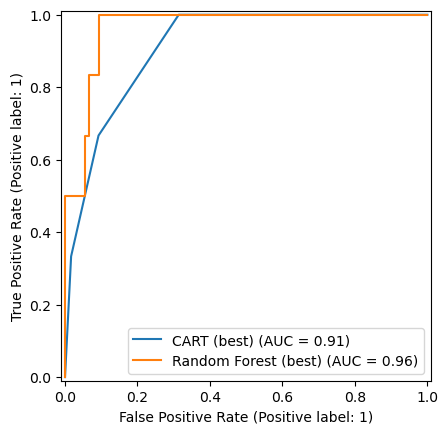

In [33]:
train_p = training_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))
valid_p = validation_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))

drop_cols = {"Allstar","y","playerID","TrainingValidation","yearID"}
feat = [c for c in train_p.columns if c not in drop_cols]

Xtr = train_p.select(feat).to_numpy(); ytr = train_p.select("y").to_numpy().ravel()
Xva = valid_p.select(feat).to_numpy(); yva = valid_p.select("y").to_numpy().ravel()

cart = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2,
                              class_weight="balanced", random_state=42).fit(Xtr,ytr)
rf   = RandomForestClassifier(n_estimators=400, max_depth=5, min_samples_leaf=3, min_samples_split=2,
                              class_weight="balanced", random_state=42, n_jobs=-1).fit(Xtr,ytr)
ax = plt.gca()
RocCurveDisplay.from_estimator(cart, Xva, yva, ax=ax, name="CART (best)")
RocCurveDisplay.from_estimator(rf,   Xva, yva, ax=ax, name="Random Forest (best)")
plt.show()
